# Crime Rate Analysis

In [234]:
folder = "/home/alexbui/workspace2022/HandbookForDatascience/notebooks/data/crime_rate"

In [165]:
import pandas as pd

## 1. Data loading & preparation

- Property_crime = burglary + larcency + motor_vehicle_theft
- We will remove these three columns and recalculate total_crime & overall crime rate

In [166]:
cr_data = pd.read_csv(folder + "/estimated_crimes.csv")

In [167]:
cr_data = cr_data[cr_data['year'] <= 2019]
cr_data.rename(columns={'state_name':'state name'}, inplace=True)
cr_data.drop(['burglary', 'larceny', 'motor_vehicle_theft'], axis=1, inplace=True)

In [168]:
cr_data['total crime'] = cr_data['violent_crime'] + cr_data['homicide'] \
                            + cr_data['robbery'] + cr_data['aggravated_assault'] + cr_data['property_crime']
cr_data['overall crime rate'] = cr_data['total crime'] / cr_data['population']

In [169]:
cr_data

,year,state_abbr,state name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,total crime,overall crime rate
0,2010,AL,Alabama,4785401,18363,275,4864,11869,168828,204199,0.042671
1,2011,AL,Alabama,4803689,20166,299,4906,13591,173192,212154,0.044165
2,2012,AL,Alabama,4817528,21693,342,5020,15035,168878,210968,0.043792
3,2013,AL,Alabama,4833996,20834,346,4645,13788,161835,201448,0.041673
4,2014,AL,Alabama,4846411,20727,276,4702,13744,154087,193536,0.039934
...,...,...,...,...,...,...,...,...,...,...,...
555,2015,WY,Wyoming,586555,1300,16,59,1054,11151,13580,0.023152
556,2016,WY,Wyoming,584910,1431,20,59,1146,11460,14116,0.024134
557,2017,WY,Wyoming,578934,1358,14,98,993,10528,12991,0.022440
558,2018,WY,Wyoming,577601,1235,14,75,885,10308,12517,0.021671


In [170]:
demography = pd.read_csv(folder + "/demography.csv")
demography.columns = [c.lower() for c in demography.columns]

We will remove all columns with absolute values as we want to estimate crime rate.

In [171]:
def remove_absolute_columns(df, keeps):
    rm_cols = [c for c in df.columns if not c in keeps and not 'percent' in c]
    df.drop(rm_cols, axis=1, inplace=True)

def clean_column_name(df):
    cols = df.columns
    new_cols = []
    for c in cols:
        c = c.replace("percent!!percentage of","")\
            .replace("percent of", "")\
            .replace("percent in ","")\
            .replace("percent","")
        if c[0] == ' ':
            c = c[1:]
        new_cols.append(c)
    df.columns = new_cols

In [172]:
keeps = ['year', 'state name', 'total population']
remove_absolute_columns(demography, keeps)

In [173]:
clean_column_name(demography)

In [174]:
demography

,year,state name,total population,male,female,18 years and over,male 18 and over,female 18 and over,two or more races,one race,white,black or african american,american indian and alaska native,asian,native hawaiian and other pacific islander,other race
0,2010,Alabama,4785298,48.5,51.5,3649870,47.7,52.3,1.4,98.6,70.7,27.0,1.2,1.4,0.1,1.2
1,2010,Alaska,713985,52.2,47.8,525600,52.2,47.8,7.0,93.0,73.8,4.6,19.3,7.0,1.7,1.3
2,2010,Arizona,6413737,49.7,50.3,4781326,49.2,50.8,2.6,97.4,81.7,4.9,5.2,3.5,0.4,7.1
3,2010,Arkansas,2921606,49.0,51.0,2210476,48.4,51.6,1.7,98.3,80.0,16.4,1.5,1.3,0.3,2.3
4,2010,California,37349363,49.7,50.3,28042134,49.2,50.8,4.2,95.8,65.9,7.1,1.8,14.8,0.8,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2019,Virginia,8535519,49.2,50.8,6677914,48.6,51.4,3.8,96.2,70.2,21.3,0.9,8.1,0.2,3.3
506,2019,Washington,7614893,50.0,50.0,5951928,49.7,50.3,6.0,94.0,79.5,5.6,3.0,11.6,1.3,5.5
507,2019,West Virginia,1792147,49.4,50.6,1433329,49.0,51.0,1.8,98.2,94.7,4.8,0.6,1.1,0.1,0.5
508,2019,Wisconsin,5822434,49.7,50.3,4559022,49.3,50.7,2.4,97.6,87.4,7.5,1.6,3.5,0.1,2.4


***Load economic data***

In [175]:
economics = pd.read_csv(folder + "/economics.csv")
economics.columns = [c.lower() for c in economics.columns]
remove_absolute_columns(economics, ['state name', 'year', 'population 16 years and over'])
economics.drop(['percent of civilian labor force','percent!!income and benefits !!less than $10,000',\
            'percent!!income and benefits !!$10,000 to $14,999','percent!!income and benefits !!$15,000 to $24,999',\
            'percent!!income and benefits !!$25,000 to $34,999','percent!!income and benefits !!$35,000 to $49,999',\
            'percent!!income and benefits !!$50,000 to $74,999','percent!!income and benefits !!$75,000 to $99,999',\
            'percent!!income and benefits !!$100,000 to $149,999','percent!!income and benefits !!$150,000 to $199,999',\
            'percent!!income and benefits !!$200,000 or more'], axis=1, inplace=True)
clean_column_name(economics)

In [176]:
eco_new_names = {
'income and benefits total households' : 'total inc & bnf',
'income and benefits less than $10,000' : 'inc & bnf lt 10k',
'income and benefits $10,000 to $14,999' : 'inc & bnf 10k-14.9K',
'income and benefits $15,000 to $24,999' : 'inc & bnf 15k-24.9K',
'income and benefits $25,000 to $34,999' : 'inc & bnf 25k-34.9K',
'income and benefits $35,000 to $49,999' : 'inc & bnf 35k-49.9K',
'income and benefits $50,000 to $74,999' : 'inc & bnf 50k-74.9K',
'income and benefits $75,000 to $99,999' : 'inc & bnf 75k-99.9K',
'income and benefits $100,000 to $149,999' : 'inc & bnf 100k-149.9K',
'income and benefits $150,000 to $199,999' : 'inc & bnf 150k-199.9K',
'income and benefits $200,000 or more' : 'inc & bnf 200k or more',
'income and benefits with earnings' : 'inc & bnf w/ earnings',
'income and benefits with social security' : 'inc & bnf w/ social security',
'income and benefits with retirement income' : 'inc & bnf w/ retirement inc',
'!!income and benefits !!with supplemental security income' : 'inc & bnf w/ supplemental security inc',
'!!income and benefits !!with cash public assistance income' : 'inc & bnf w/ cash public assistance inc',
'!!income and benefits !!with food stamp/snap benefits in the past 12 months' : 'inc & bnf w/ food stamp/snap benefits',
'!!income and benefits !!families' : 'inc & bnf families',
'!!income and benefits !!nonfamily households' : 'inc & bnf nonfamily households',
'!!health insurance coverage!!civilian noninstitutionalized population':'civilian noninstitutionalized elibible for h_ins',
'!!health insurance coverage!!civilian noninstitutionalized population under 18 years':'civilian noninstitutionalized u18 elibible for h_ins',
'!!health insurance coverage!!no health insurance coverage':'no h_ins cvrge',
'!!health insurance coverage!!civilian noninstitutionalized population 18 to 64 years':'civilian noninstitutionalized 18-64 eligible for h_ins',
'!!health insurance coverage!!in labor force':'in lbr eligible for h_ins',
'!!health insurance coverage!!in labor force!!employed':'empl eligible for h_ins',
'!!health insurance coverage!!in labor force!!employed!!with health insurance coverage':'empl w/ h_ins',
'!!health insurance coverage!!in labor force!!employed!!with health insurance coverage!!with private health insurance':'empl w/ private h_ins',
'!!health insurance coverage!!in labor force!!employed!!with health insurance coverage!!with public coverage':'empl w/ public h_ins',
'!!health insurance coverage!!in labor force!!employed!!no health insurance coverage':'empl w/o h_ins cvrge',
'!!health insurance coverage!!in labor force!!unemployed':'unempl elibible for h_ins',
'!!health insurance coverage!!in labor force!!unemployed!!with health insurance coverage':'unempl w/ h_ins cvrge',
'!!health insurance coverage!!in labor force!!unemployed!!with health insurance coverage!!with private health insurance':'unempl w/ private h_ins',
'!!health insurance coverage!!in labor force!!unemployed!!with health insurance coverage!!with public coverage':'unempl w/ public h_ins',
'!!health insurance coverage!!in labor force!!unemployed!!no health insurance coverage':'unempl w/o h_ins',
'!!health insurance coverage!!not in labor force':'not in lbr eligible for h_ins',
'!!health insurance coverage!!not in labor force!!with health insurance coverage':'not in lbr w/ h_ins',
'!!health insurance coverage!!not in labor force!!with health insurance coverage!!with private health insurance':'not in lbr w/ private h_ins',
'!!health insurance coverage!!not in labor force!!with health insurance coverage!!with public coverage':'not in lbr w/ public h_ins',
'!!health insurance coverage!!not in labor force!!no health insurance coverage':'not in lbr w/o h_ins',
'families and people whose income in the past 12 months is below the poverty level!!all families!!with related children under 18 years': 'fm_pp inc(12m) lt pvt lv (all families & rel children u18)',
'families and people whose income in the past 12 months is below the poverty level!!all families!!with related children under 18 years!!with related children under 5 years only': 'fm_pp inc(12m) lt pvt lv (all families & rel children u5)',
'families and people whose income in the past 12 months is below the poverty level!!married couple families': 'fm_pp inc(12m) lt pvt lv (married)',
'families and people whose income in the past 12 months is below the poverty level!!married couple families!!with related children under 18 years': 'fm_pp inc(12m) lt pvt lv (married & rel children u18)',
'families and people whose income in the past 12 months is below the poverty level!!married couple families!!with related children under 18 years!!with related children under 5 years only': 'fm_pp inc(12m) lt pvt lv (married & rel children u5)',
'families and people whose income in the past 12 months is below the poverty level!!families with female householder, no husband present': 'fm_pp inc(12m) lt pvt lv (no husband)',
'families and people whose income in the past 12 months is below the poverty level!!families with female householder, no husband present!!with related children under 18 years': 'fm_pp inc(12m) lt pvt lv (no husband & rel children u18)',
'families and people whose income in the past 12 months is below the poverty level!!families with female householder, no husband present!!with related children under 18 years!!with related children under 5 years only': 'fm_pp inc(12m) lt pvt lv (no husband & rel children u5)',
'families and people whose income in the past 12 months is below the poverty level!!under 18 years!!related children under 18 years': 'fm_pp inc(12m) lt pvt lv (rel children u18)',
'families and people whose income in the past 12 months is below the poverty level!!under 18 years!!related children under 18 years!!related children under 5 years': 'fm_pp inc(12m) lt pvt lv (rel children u5)',
'families and people whose income in the past 12 months is below the poverty level!!under 18 years!!related children under 18 years!!related children 5 to 17 years': 'fm_pp inc(12m) lt pvt lv (rel children 5-17)',
'families and people whose income in the past 12 months is below the poverty level!!18 years and over': 'fm_pp inc(12m) lt pvt lv (rel o18)',
'families and people whose income in the past 12 months is below the poverty level!!18 years and over!!65 years and over': 'fm_pp inc(12m) lt pvt lv (rel o65)',
'families and people whose income in the past 12 months is below the poverty level!!people in families': 'fm_pp inc(12m) lt pvt lv (rel)',
'families and people whose income in the past 12 months is below the poverty level!!unrelated individuals 15 years and over': 'fm_pp inc(12m) lt pvt lv (unrel o15)'
}
economics.rename(columns=eco_new_names, inplace=True)

***Load social characteristic data***

In [177]:
social = pd.read_csv(folder + "/social_characteristics.csv")
social.columns = [c.lower() for c in social.columns]
clean_column_name(social)

In [178]:
social

,year,state name,single mothers/fathers,high school graduate or higher,bachelor's degree or higher,people having the same house as previous year,foreign born,not a u.s. citizen,using language other than english at home
0,2010,Alabama,0.372405,82.1,21.9,84.3,3.5,71.5,5.2
1,2011,Alabama,0.361194,82.7,22.3,84.8,3.4,64.6,5.2
2,2012,Alabama,0.356240,84.0,23.3,85.1,3.4,65.7,5.1
3,2013,Alabama,0.379877,84.5,23.5,85.1,3.4,63.1,5.1
4,2014,Alabama,0.370406,84.7,23.5,85.2,3.2,65.2,4.9
...,...,...,...,...,...,...,...,...,...
495,2015,Wyoming,0.283117,92.2,26.2,82.0,3.8,61.4,7.5
496,2016,Wyoming,0.299787,93.2,27.1,81.9,3.2,60.8,7.6
497,2017,Wyoming,0.290482,92.9,27.6,83.9,3.5,64.8,8.2
498,2018,Wyoming,0.286398,93.3,26.9,84.0,3.0,64.0,7.0


***Merge all together***

In [179]:
merge_data = cr_data.set_index(['year', 'state name']) \
                    .join(demography.set_index(['year', 'state name']), how='left') \
                    .join(economics.set_index(['year', 'state name']), how='left') \
                    .join(social.set_index(['year', 'state name']), how='left')

In [180]:
merged_columns = merge_data.columns
sc = set([])
for c in merged_columns:
    indices = merge_data[merge_data[c].isnull()].index
    merge_data.drop(indices, axis=0, inplace=True)

***1. We look at the data correlation***

Correlation matrix presents the association of attributes. We can filter out columns which are lowly correlated with the target. Nevertheless, correlation is not causation [1]. For example, as you can see population is highly correlated with all types of crimes. However, can you state that a high crime rate is caused by a large population size?

[1] The book of why, Judea Pearl

In [181]:
data_corr = merge_data.corr()
data_corr

,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,total crime,overall crime rate,total population,male,...,fm_pp inc(12m) lt pvt lv (rel o65),fm_pp inc(12m) lt pvt lv (rel),fm_pp inc(12m) lt pvt lv (unrel o15),single mothers/fathers,high school graduate or higher,bachelor's degree or higher,people having the same house as previous year,foreign born,not a u.s. citizen,using language other than english at home
population,1.000000,0.978410,0.949033,0.972231,0.960358,0.961943,0.971999,0.069132,0.999996,-0.211033,...,0.282583,0.199272,0.008878,0.028890,-0.458599,0.128254,0.164116,0.626626,-0.112005,0.609261
violent_crime,0.978410,1.000000,0.959768,0.974102,0.994618,0.963926,0.978911,0.180969,0.978409,-0.198242,...,0.325419,0.256309,0.051233,0.085992,-0.507659,0.055939,0.122886,0.606103,-0.066160,0.609100
homicide,0.949033,0.959768,1.000000,0.934773,0.951328,0.936441,0.948050,0.188761,0.948953,-0.271662,...,0.347504,0.301874,0.096475,0.144428,-0.530354,0.009726,0.155201,0.520839,-0.052885,0.518251
robbery,0.972231,0.974102,0.934773,1.000000,0.948529,0.950633,0.962941,0.124335,0.972220,-0.187089,...,0.282046,0.218506,0.013816,0.072395,-0.494279,0.090885,0.161775,0.638420,-0.105410,0.627769
aggravated_assault,0.960358,0.994618,0.951328,0.948529,1.000000,0.952909,0.969198,0.214823,0.960351,-0.207663,...,0.347396,0.277627,0.072418,0.100841,-0.516680,0.033077,0.107056,0.586029,-0.042444,0.592552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bachelor's degree or higher,0.128254,0.055939,0.009726,0.090885,0.033077,0.015914,0.025234,-0.441470,0.128379,-0.053811,...,-0.411320,-0.712434,-0.740243,-0.490834,0.497342,1.000000,0.255962,0.487716,-0.539226,0.366874
people having the same house as previous year,0.164116,0.122886,0.155201,0.161775,0.107056,0.032122,0.054607,-0.347691,0.164224,-0.622405,...,0.198246,-0.072729,-0.049099,0.075472,-0.079926,0.255962,1.000000,0.147235,-0.445093,0.066742
foreign born,0.626626,0.606103,0.520839,0.638420,0.586029,0.559504,0.574840,-0.002050,0.626726,-0.098111,...,0.046064,-0.134284,-0.364538,-0.136254,-0.228808,0.487716,0.147235,1.000000,-0.364084,0.928745
not a u.s. citizen,-0.112005,-0.066160,-0.052885,-0.105410,-0.042444,0.014102,-0.004825,0.424714,-0.112078,0.047276,...,0.279728,0.527138,0.513294,0.214941,-0.397552,-0.539226,-0.445093,-0.364084,1.000000,-0.233069


In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
merge_data_cp = merge_data.copy()
merge_data_cp['total crime per 1k population'] = merge_data['total crime'] / merge_data['population'] * 1000

Text(0.5, 1.0, 'Total Crime')

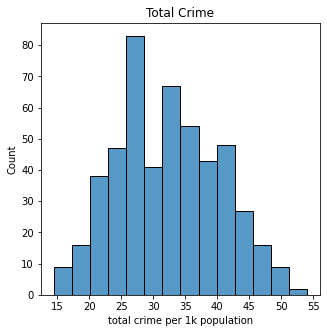

In [184]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=merge_data_cp, x='total crime per 1k population', ax=ax)
ax.set_title('Total Crime')

***2. Filter columns w/ threshold***

In [185]:
crime_names = ["violent_crime","homicide","robbery","aggravated_assault","property_crime"]

In [186]:
columns = data_corr[(data_corr['total crime'] >= 0.1) | (data_corr['total crime'] <= -0.1)]['total crime']

## 2. Crime Rate Analysis with all US data

### 2.1. Prepare training data

Using data from previous year to predict the next year crime rate

In [187]:
def get_train_test_data(selected_data):
    train_data = selected_data[(selected_data['year'] >= 2010) & (selected_data['year'] < 2018)] \
                            .sort_values(by=['state name', 'year']) \
                            .drop(['state name', 'year'], axis=1)
    test_data = selected_data[(selected_data['year'] >= 2018) & (selected_data['year'] < 2019)] \
                            .sort_values(by=['state name', 'year']) \
                            .drop(['state name', 'year'], axis=1)
    return train_data, test_data

In [188]:
def get_train_test_label(target_label, lb='overall crime rate'):
    train_label = target_label[target_label['year'] < 2019].sort_values(by=['state name', 'year'])[lb]
    test_label = target_label[target_label['year'] == 2019].sort_values(by=['state name', 'year'])[lb]
    return train_label, test_label

In [189]:
def extract_label(merge_data, lb='overall crime rate'):
    target_label = merge_data.reset_index()[['state name', 'year', lb]]
    target_label = target_label[target_label['year'] > 2010].sort_values(by=['state name', 'year']) 
    target_label[lb] = target_label[lb] * 1000
    return target_label

In [190]:
target = 'overall crime rate'
skip_columns = ['total crime', 'overall crime rate']
selected_features = []
for i, v in zip(columns.index, columns):
    if i in crime_names or i in skip_columns:
        continue
    selected_features.append(i)
selected_data = merge_data[selected_features]

In [191]:
selected_data = selected_data.reset_index()
target_label = extract_label(merge_data)
train_data, test_data = get_train_test_data(selected_data)
train_label, test_label = get_train_test_label(target_label)

### 2.2. Build a model to predict crime rate of USA

In [204]:
import shap
shap.initjs()
from xgboost import XGBRegressor

In [193]:
from sklearn.metrics import mean_absolute_error as mae

In [194]:
def init_model(train_data, train_label):
    model = XGBRegressor().fit(train_data, train_label)
    return model

In [195]:
model1 = init_model(train_data, train_label)
pred = model1.predict(test_data)
acc = mae(test_label, pred)
acc

2.3193407831889634

### 2.3 Model Interpretation

***Initialize explainer***

In [205]:
explainer1 = shap.Explainer(model1)
sh_values = explainer1(test_data)

***Plotting global summarization***

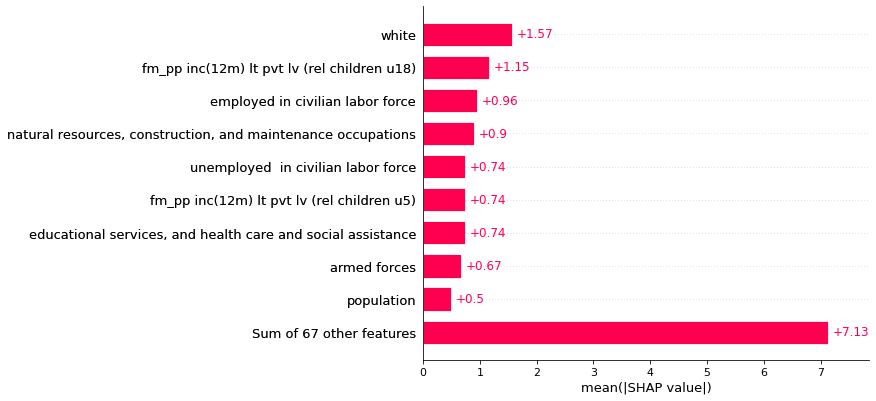

In [207]:
shap.plots.bar(sh_values, max_display=10)

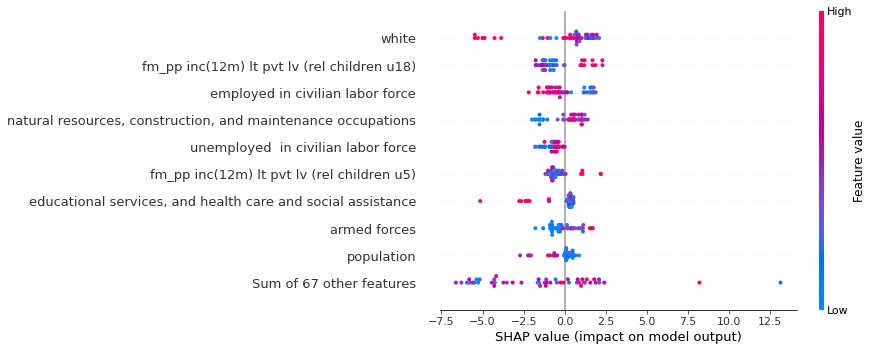

In [209]:
shap.plots.beeswarm(sh_values, max_display=10)

In [212]:
# you can printout a hierachical tree of feature interaction
# shap.plots.bar(sh_values, max_display=30, clustering=shap.utils.hclust(test_data, test_label))

***Explanation:***
1. % of white people. Higher, less crime rate.
2. % families & people whose income in the past 12 months < poverty level. The higher, the more crime rate. 
3. % of employed in civilian labor force. The higher, the less crime rate.
4. natural resources, construction, & maintenance occupations. Higher, more crime rate.
5. % Unemployed in civilian labor force. Lower, less crime rate.
Similar for other factors. You should also check additional resources for more detailed information about each factor.

## 3. Selecting 5 states w/ different profiles and analyzing them 

You don't need to build separate models for each state as we only has 9 records for each one of them. Instead, using 1 big model that fits all states will be better. States with similar properties will have the same pattern. Therefore, if you really want to make separate models for them, each model should be trained with a cluster of data instead of individual state data.

You only need to select 5 states for task 4.

To select 5 states, you can either clasify them into clusters or using feature similarity methods.

Let's use K-mean for simplicity

In [196]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [197]:
aggregated_data = merge_data.groupby(by='state_abbr').mean()

In [198]:
scaled_data = MinMaxScaler().fit_transform(aggregated_data)

pca = PCA(n_components=2)
scaled_data = pca.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, index=aggregated_data.index, columns=['x1', 'x2'])

In [199]:
cluster_engine = KMeans(n_clusters=5)
cluster_engine.fit(scaled_data)
clusters = cluster_engine.predict(scaled_data)

In [213]:
df_clusters = pd.DataFrame(np.concatenate([scaled_data, clusters[:, np.newaxis]], axis=1), index=aggregated_data.index, columns=['x1','x2','cluster'])
df_clusters['cluster'] = df_clusters['cluster'].astype(np.int32) + 1
df_clusters = df_clusters.sort_values(by='cluster', axis=0)
df_clusters

,x1,x2,cluster
state_abbr,,,
MS,2.954720,-0.587444,1
WV,2.141322,-1.009799,1
NM,2.107891,-0.258944,1
KY,1.780408,-0.549373,1
SC,1.499312,-0.173321,1
TN,1.461026,-0.064388,1
OK,1.334799,-0.642304,1
AR,2.162706,-0.746857,1
AL,1.928467,-0.253168,1


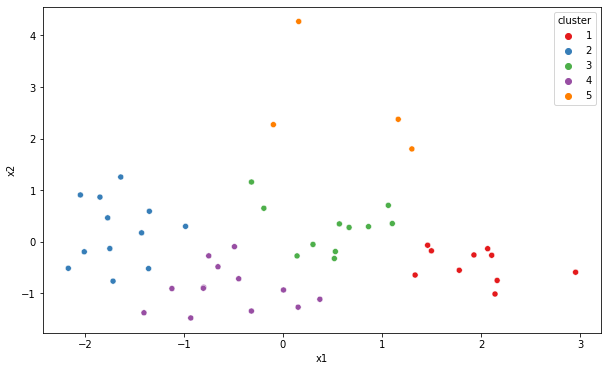

In [203]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='x1', y='x2', palette='Set1', hue='cluster', data=df_clusters, ax=ax)
plt.show()

***State selection:***
Based on the clustering result, we can select 5 states as follows:
1. Nevada
2. Florida
3. Alaska
4. Ohio
5. Louisiana

K-mean result may be different at each execution time due to its initialization state.

In [215]:
states = target_label[(target_label['year'] == 2019)]['state name'].tolist()
state_index = {}
for i, s in enumerate(states):
    state_index[s] = i
state_index

{'Alabama': 0,
 'Alaska': 1,
 'Arizona': 2,
 'Arkansas': 3,
 'California': 4,
 'Colorado': 5,
 'Connecticut': 6,
 'Delaware': 7,
 'Florida': 8,
 'Georgia': 9,
 'Hawaii': 10,
 'Idaho': 11,
 'Illinois': 12,
 'Indiana': 13,
 'Iowa': 14,
 'Kansas': 15,
 'Kentucky': 16,
 'Louisiana': 17,
 'Maine': 18,
 'Maryland': 19,
 'Massachusetts': 20,
 'Michigan': 21,
 'Minnesota': 22,
 'Mississippi': 23,
 'Missouri': 24,
 'Montana': 25,
 'Nebraska': 26,
 'Nevada': 27,
 'New Hampshire': 28,
 'New Jersey': 29,
 'New Mexico': 30,
 'New York': 31,
 'North Carolina': 32,
 'North Dakota': 33,
 'Ohio': 34,
 'Oklahoma': 35,
 'Oregon': 36,
 'Pennsylvania': 37,
 'Rhode Island': 38,
 'South Carolina': 39,
 'South Dakota': 40,
 'Tennessee': 41,
 'Texas': 42,
 'Utah': 43,
 'Vermont': 44,
 'Virginia': 45,
 'Washington': 46,
 'West Virginia': 47,
 'Wisconsin': 48,
 'Wyoming': 49}

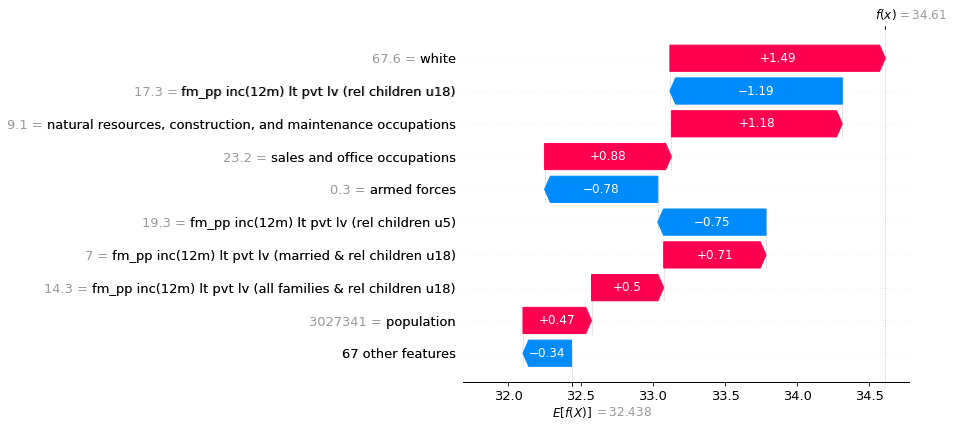

In [216]:
shap.plots.waterfall(sh_values[27])

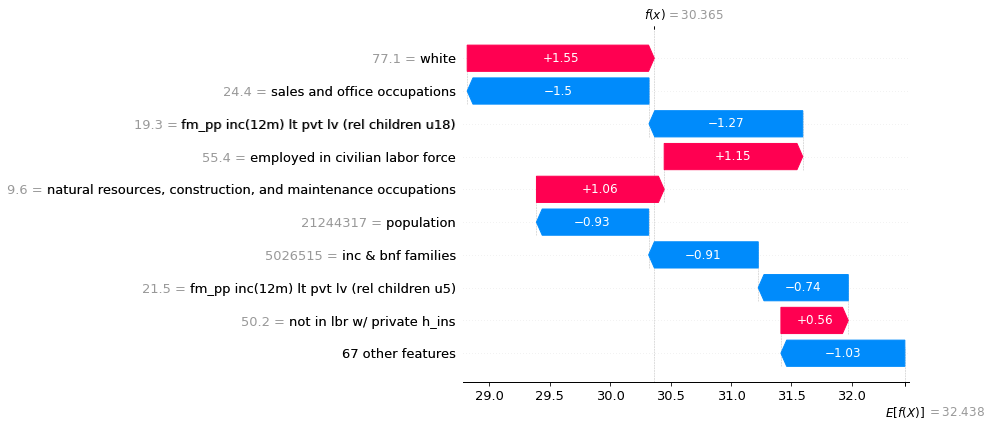

In [217]:
shap.plots.waterfall(sh_values[8])

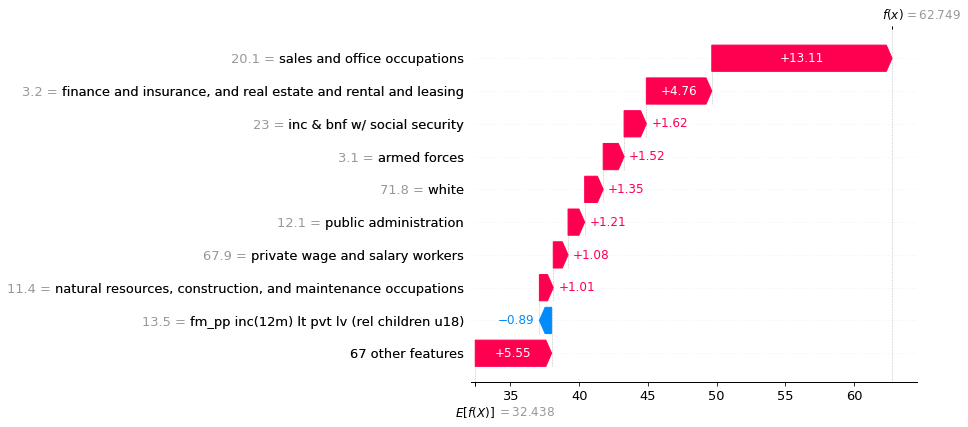

In [218]:
shap.plots.waterfall(sh_values[1])

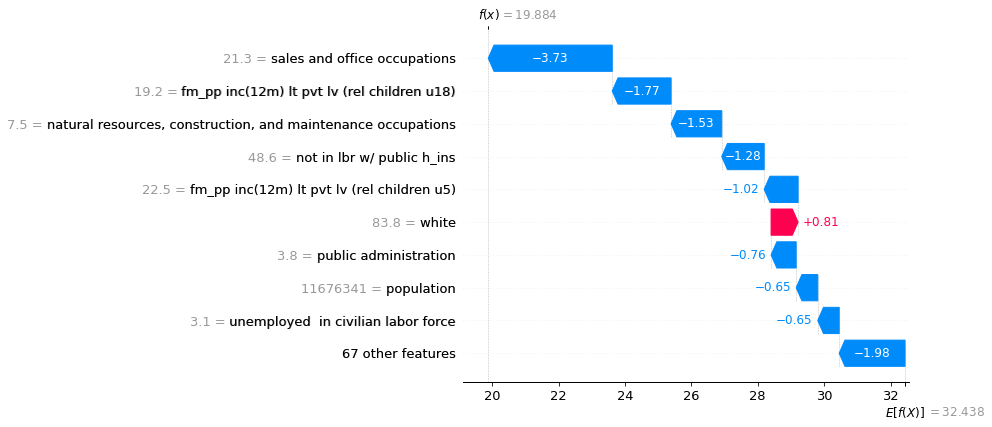

In [219]:
shap.plots.waterfall(sh_values[34])

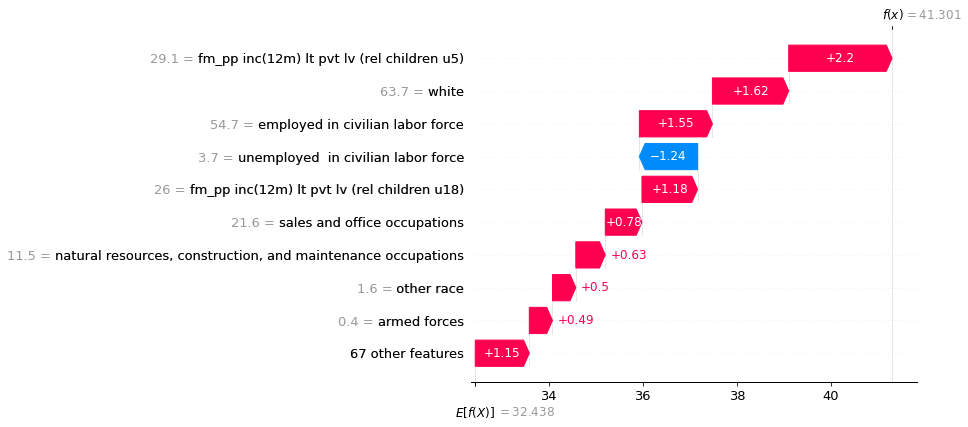

In [220]:
shap.plots.waterfall(sh_values[17])

## 4. Crime Analysize for 2 Specific Types of Crimes Homicide and Property Crime

As mentioned above, correlation is not causation. Therefore, as of now, we can't say which causes high crime rates or low crime rates. Therefore, let's select two types of crimes based on its natural motive for crime: homicide and property_crime.

### 4.1 Homicide

In [221]:
h_crime_names = set(["total crime","overall crime rate","homicide","violent_crime","robbery","aggravated_assault","property_crime","burglary","larceny","motor_vehicle_theft"])
columns = data_corr[(data_corr['homicide'] >= 0.1) | (data_corr['homicide'] <= -0.1)]['homicide']

h_selected_features = []
for i, v in zip(columns.index, columns):
    if i in h_crime_names:
        continue
    h_selected_features.append(i)

In [222]:
merge_data_2 = merge_data.copy()
merge_data_2['homicide_rate'] = merge_data_2['homicide'] / merge_data_2['population']
h_selected_data = merge_data[h_selected_features]
h_selected_data = h_selected_data.reset_index()
h_train_data, h_test_data = get_train_test_data(h_selected_data)
h_target_label = extract_label(merge_data_2, 'homicide_rate')
h_train_label, h_test_label = get_train_test_label(h_target_label, lb='homicide_rate')

In [223]:
h_model = init_model(h_train_data, h_train_label)

In [224]:
h_pred = h_model.predict(h_test_data)
acc = mae(h_test_label, h_pred)
acc

0.007032788194078566

In [225]:
h_explainer = shap.Explainer(h_model)
sh_h_values = h_explainer(h_test_data)

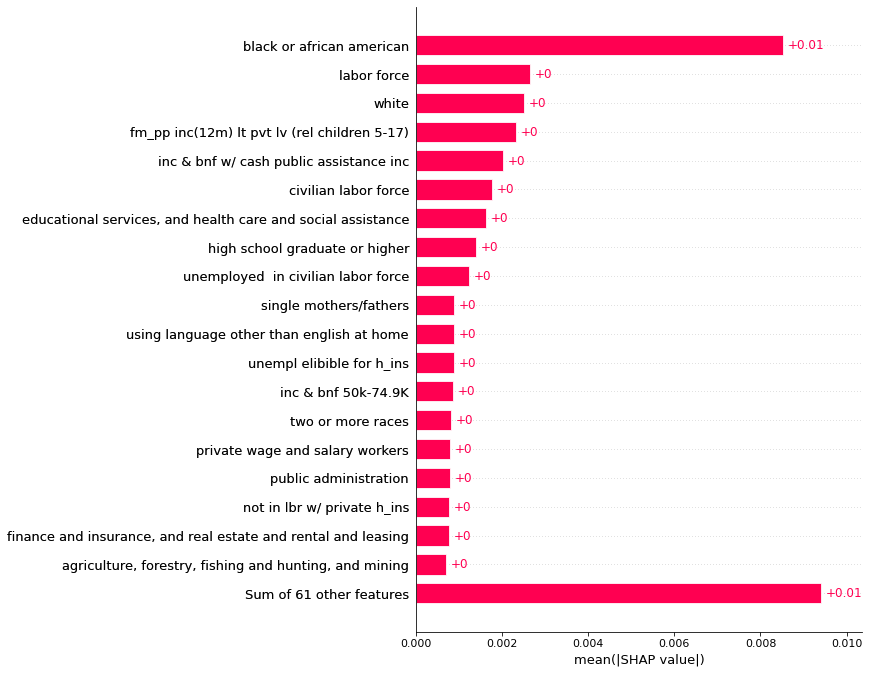

In [226]:
shap.plots.bar(sh_h_values, max_display=20)

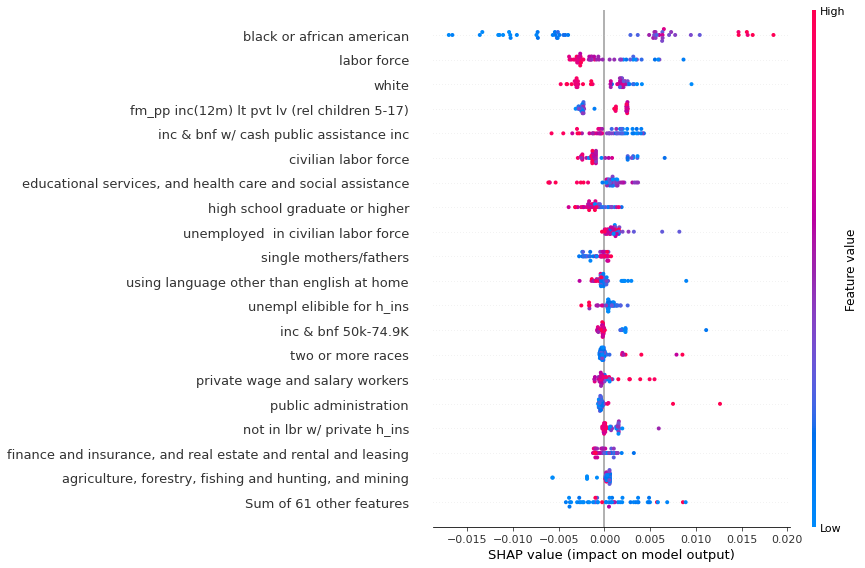

In [230]:
shap.plots.beeswarm(sh_h_values, max_display=20)

***Explanation:***
1. % of black or african american. The higher, the more homicide crime rate. It's a sensitive factor as we don't know Whether black people are victims or murderers. Please refer to this figure: https://www.statista.com/statistics/251877/murder-victims-in-the-us-by-race-ethnicity-and-gender/.
    As pointed here, non-white people are died from homicide cases more than white.
2. Labor force. The higher, the less. 
3. % of white. The higher, the less. Corresponding to 1st factor.

### 4.2 Property Crime

In [227]:
p_crime_names = set(["total crime","overall crime rate","violent_crime","homicide","robbery","aggravated_assault","burglary","larceny","motor_vehicle_theft"])
columns = data_corr[(data_corr['property_crime'] >= 0.1) | (data_corr['property_crime'] <= -0.1)]['property_crime']

p_selected_features = []
for i, v in zip(columns.index, columns):
    if i in p_crime_names:
        continue
    p_selected_features.append(i)

In [228]:
merge_data_3 = merge_data.copy()
merge_data_3['property_crime_rate'] = merge_data_2['property_crime'] / merge_data_2['population']
p_selected_data = merge_data[p_selected_features]
p_selected_data = p_selected_data.reset_index()
p_train_data, p_test_data = get_train_test_data(p_selected_data)
p_target_label = extract_label(merge_data_3, 'property_crime_rate')
p_train_label, p_test_label = get_train_test_label(p_target_label, lb='property_crime_rate')

In [229]:
p_model = init_model(p_train_data, p_train_label)
p_pred = p_model.predict(p_test_data)
acc = mae(p_test_label, p_pred)
acc

1.7687593804883424

In [231]:
p_explainer = shap.Explainer(p_model)
sh_p_values = p_explainer(p_test_data)

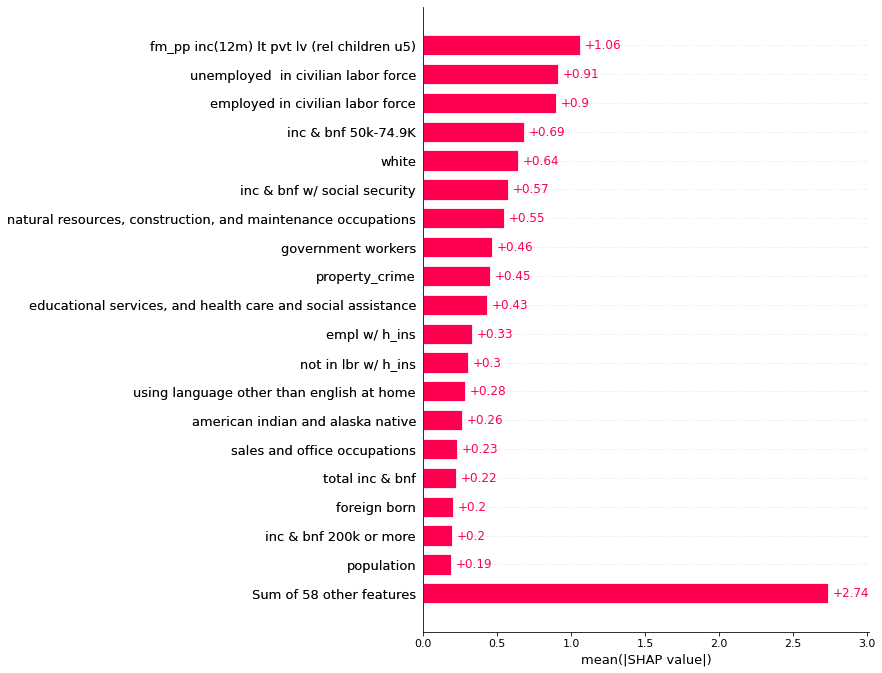

In [232]:
shap.plots.bar(sh_p_values, max_display=20)

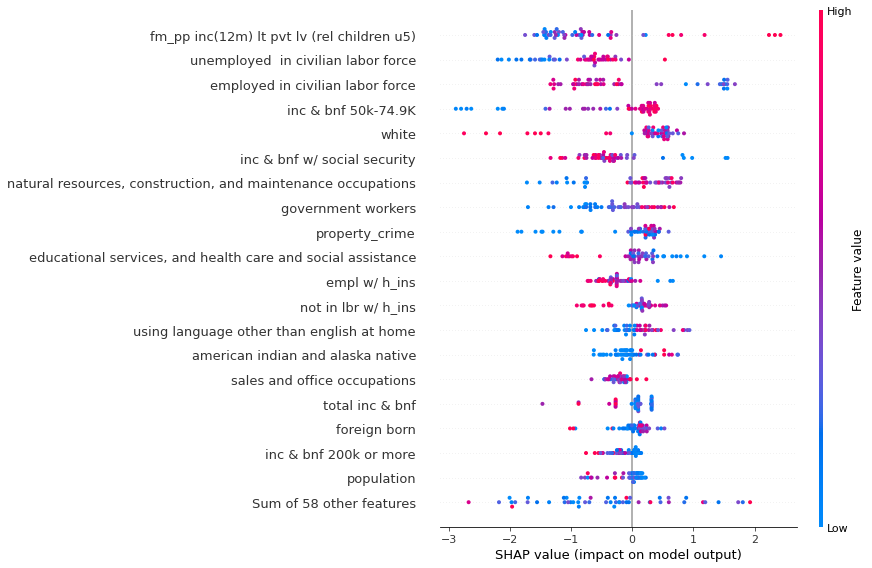

In [233]:
shap.plots.beeswarm(sh_p_values, max_display=20)

***Explanation:***
1. Family w/ related children under 5. The higher, the more property crime rate. Surprisingly. Poverty level ~ crime rate
2. Percent of unemployed in labor force. It's a natural factor. The higher, the more property crime rate.
3. Similar to 2nd factor.
4. inc & benifit from 50 -> 74.9K. Higher, less crime rate. When people have enough money for food and living, they tend not to commit property crime.
5. % White. Guess: white people are usually rich. The higher, the less property crime rate. Property crimes usually commited by non-white people. 